<a href="https://colab.research.google.com/github/OrleneJane/Sentiment-Analysis-and-Text-Mining/blob/main/Assignment_5_Predicting_Student_Exam_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load and Preprocess the Dataset

In the first step, I loaded the dataset containing student exam performance. I cleaned the column names to make them easier to use and identified which columns were categorical, such as gender, race/ethnicity, parental level of education, lunch type, and test preparation course. Since machine learning models require numerical input, I used OneHotEncoding to convert these text categories into numbers that the model can understand.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

# Load the dataset into a pandas DataFrame
csv_file_path = os.path.join(path, 'StudentsPerformance.csv')
df = pd.read_csv(csv_file_path)

# Display the first few rows
print(df.head())

# Rename columns for easier use (optional)
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
print(df.head())

Path to dataset files: /kaggle/input/students-performance-in-exams
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
   gender race/ethnicity parental_level_of_education         lunch  \
0  female        group

In [4]:
import os

# List files in the downloaded directory
print(os.listdir(path))

['StudentsPerformance.csv']


2. Visualize Distributions and Correlations

Next, I explored the dataset by visualizing the distribution of math scores to see how students performed overall. I also created a heatmap to check the correlation between math, reading, and writing scores. This helped me understand which variables are closely related and might affect each other. I noticed strong correlations, especially between reading and writing scores.

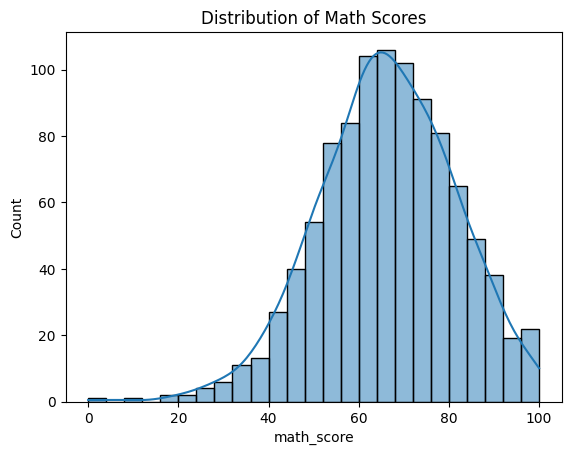

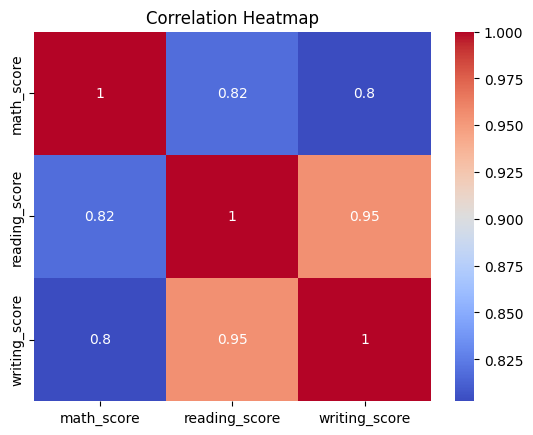

In [6]:
# Distribution of math scores
sns.histplot(df['math_score'], kde=True)
plt.title("Distribution of Math Scores")
plt.show()

# Correlation heatmap
numeric_cols = ['math_score', 'reading_score', 'writing_score']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


3. Encode Categorical Features and Split the Data

I prepared the data for modeling by selecting the features (inputs) and the target variable (math score). Then, I applied OneHotEncoding to the categorical columns and kept the rest of the features as they were. I split the dataset into training and testing sets, so the model could learn from one part and be tested on another, helping to evaluate how well it generalizes to new data.

In [7]:
# Define features and target
X = df.drop(columns=['math_score'])  # Predicting math score
y = df['math_score']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# OneHotEncode categorical features
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')

X_encoded = ct.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


4. Build and Train the Linear Regression Model

In this step, I built a Multiple Linear Regression model using the training data. The model learned the relationships between the input features and the math score. After training, I used the model to predict math scores on the test data to see how accurate it was at estimating students' performance.

In [8]:
# Build model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


5. Evaluate Model Performance

To check how well the model performed, I used three evaluation metrics: R² score, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). The R² score showed how much of the variation in math scores was explained by the model. MAE gave the average size of the prediction errors, and RMSE showed the overall prediction accuracy, especially how large errors were handled. These metrics helped me understand the strengths and weaknesses of the model.

In [9]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


R² Score: 0.880
Mean Absolute Error (MAE): 4.21
Root Mean Squared Error (RMSE): 5.39


6. Analyze the Effect of Test Preparation and Parental Education

I also analyzed how specific factors like the test preparation course and the parental level of education affected math scores. Using boxplots, I found that students who completed a test preparation course generally scored higher. Similarly, students whose parents had higher education levels tended to perform better in math. This showed how external support and family background can influence academic success.

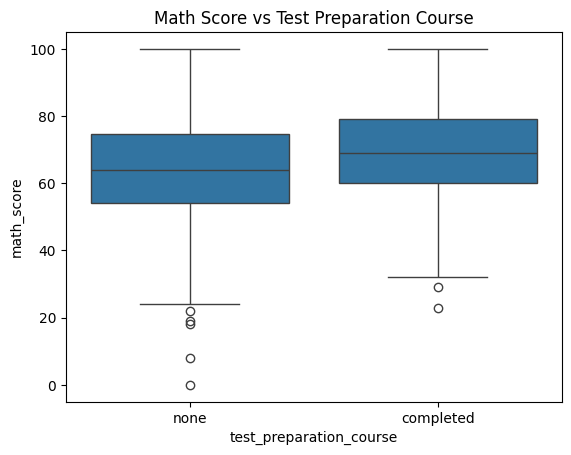

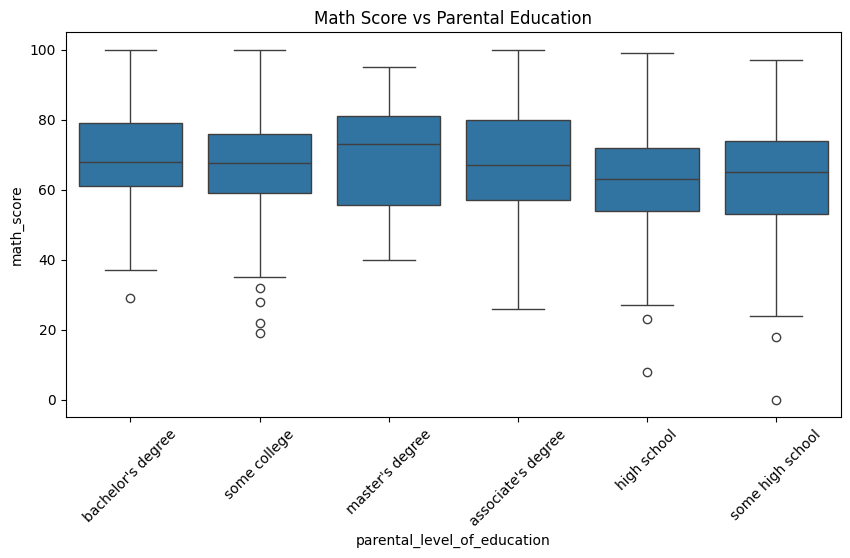

In [10]:
# Boxplot: Test preparation course vs math score
sns.boxplot(x='test_preparation_course', y='math_score', data=df)
plt.title("Math Score vs Test Preparation Course")
plt.show()

# Boxplot: Parental education level vs math score
plt.figure(figsize=(10, 5))
sns.boxplot(x='parental_level_of_education', y='math_score', data=df)
plt.xticks(rotation=45)
plt.title("Math Score vs Parental Education")
plt.show()


7. Bonus: Build Models by Gender

As a bonus, I created separate regression models for male and female students. I repeated the same steps—encoding, training, and testing—for each gender group and compared their performance. This helped me see whether gender had any noticeable impact on the prediction accuracy and understand differences in learning patterns between boys and girls.

In [11]:
for gender in df['gender'].unique():
    print(f"\n--- {gender.upper()} ---")
    gender_df = df[df['gender'] == gender]
    X_gender = gender_df.drop(columns=['math_score'])
    y_gender = gender_df['math_score']

    ct_gender = ColumnTransformer([
        ('encoder', OneHotEncoder(drop='first'), categorical_cols)
    ], remainder='passthrough')

    X_gender_encoded = ct_gender.fit_transform(X_gender)
    X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_gender_encoded, y_gender, test_size=0.2, random_state=42)

    model_g = LinearRegression()
    model_g.fit(X_train_g, y_train_g)
    y_pred_g = model_g.predict(X_test_g)

    print(f"R²: {r2_score(y_test_g, y_pred_g):.3f}")
    print(f"MAE: {mean_absolute_error(y_test_g, y_pred_g):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test_g, y_pred_g)):.2f}")



--- FEMALE ---
R²: 0.900
MAE: 4.42
RMSE: 5.48

--- MALE ---
R²: 0.852
MAE: 4.54
RMSE: 5.42
